# **Tarea semanal 4 Bis Bis** <img src="https://www.incluyeme.com/wp-content/uploads/2021/03/utn.jpg" width="300" align="right"/>

#### *Alumnos*:
*   Almaraz, Nicolás
*   Yañez $\lambda$, Joaquín

## Consignas

Se pide diseñar un filtro pasabanda que cumpla con la siguiente plantilla:

* $\omega _0=2\pi 22kHz$
* $Q=5$
* Aproximación Chebyshev con ripple de 0,5 dB

También se sabe que la transferencia del filtro debe ser:

* $\left | T(fs1)) \right | = -16 dB$ para $f_s1=17kHz$ 
* $\left | T(fs2)) \right | = -24 dB$ para $f_s2=36kHz$ 

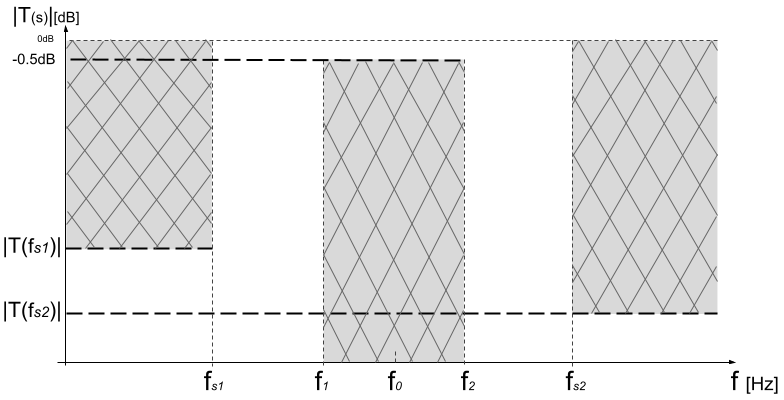

**Consignas de la actividad:**

👉  Obtener la plantilla de diseño pasabanda normalizada

👉  Obtener la función transferencia normalizada del prototipo pasabajo que satisfaga el requerimiento del filtro pasabanda.

👉  Obtener la transferencia pasabanda normalizada

👉  Implementar mediante secciones pasivas separadas por seguidores de tensión activos.

👉  Activar las redes pasivas mediante la red propuesta aquí debajo y comprobar mediante simulación el comportamiento deseado.

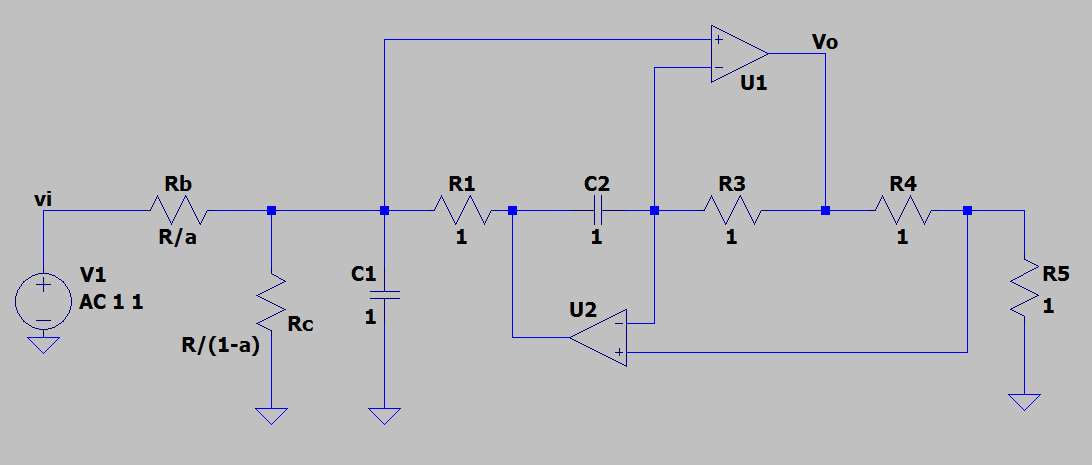

## Cálculos

Se adjuntan las resoluciones de ambos en papel del ejercicio.

### Nicolas

In [1]:
from IPython.display import IFrame

IFrame(src='TS4BisBisNico.pdf', width=800, height=600)

### Joaquin 

In [2]:
IFrame(src='TS4BisBisJoaquin.pdf', width=800, height=600)

## Simulaciones Numéricas

#### ***Librerías externas NumPy, SciPy y Matplotlib***

In [3]:
from scipy.signal import TransferFunction
import matplotlib.pyplot as plt
import numpy as np
import scipy.signal as sig

# Librería de TC2, esta la vas a usar mucho
from pytc2.sistemas_lineales import analyze_sys, pretty_print_lti, pretty_print_SOS

plt.figure(1)
plt.close(1)

#### ***Datos proporcionados por el enunciado***

In [4]:
amax = 0.5
amini = 16
amins = 24

fo = 22000
fsi = 17000
fss = 36000
Q = 5

#### ***Cálculo de los parámetros que faltan del filtro***

In [5]:
BW = fo/Q #Calculado en hertz

f1 ,f2 = np.roots([1, -BW, -fo**2])

fps = f1
if (fps < 0):
    fps = f2 #Me quedo con el resultado positivo de las raíces

fpi = fps - BW


print("fpi =", fpi)
print("fps =", fps)

fpi = 19909.72636646596
fps = 24309.72636646596


#### ***Normalización de las frecuencias***

In [6]:
norma_w = 2*np.pi*fo

w0 = 2*np.pi*fo/norma_w

wpi = 2*np.pi*fpi/norma_w
wsi = 2*np.pi*fsi/norma_w
wps = 2*np.pi*fps/norma_w
wss = 2*np.pi*fss/norma_w

#### ***Transformamos al filtro pasabajos prototipo y se calcula el epsilon necesario***

In [7]:
Wpi = Q*(w0**2-wpi**2)/wpi/w0
Wsi = Q*(w0**2-wsi**2)/wsi/w0

Wps = -Q*(w0**2-wps**2)/wps/w0
Wss = -Q*(w0**2-wss**2)/wss/w0

print("Wpi =", Wpi, "Wsi =", Wsi)
print("Wps =", Wps, "Wss =", Wss,"\n")

ee = 10**(amax/10)-1

print("epsilon^2 =", ee,"\n")


Wpi = 0.9999999999999992 Wsi = 2.6069518716577527
Wps = 1.0000000000000024 Wss = 5.126262626262628 

epsilon^2 = 0.12201845430196334 



#### ***Calculo del orden del filtro, se hace dos veces ya que la plantilla es asimétrica***

In [8]:
print("Ahora se calculará el orden del filtro necesario para satisfacer las restricciones por ambos lados \n")
ni = 0
for i in  range (1, 5):
      at = 10*np.log10(1 + ee* np.cosh(i*np.arccosh(Wsi))**2)
      print("Si n =", i, "Atenuación en Wsi =", at)
      if (at > amini and ni == 0):
          ni = i
print ("El orden del filtro elegido para cumplir con la restricción inferior es n =", ni,"\n")


ns = 0
for i in  range (1, 5):
      at = 10*np.log10(1 + ee* np.cosh(i*np.arccosh(Wss))**2)
      print("Si n =", i, "Atenuación en Wsi =", at)
      if (at > amini and ns == 0):
          ns = i
print ("El orden del filtro elegido para cumplir con la restricción superior es n =", ns,"\n")

if (ni > ns):
    n = ni
else:
    n = ns
print ("Se trabajará con un filtro de orden n=",n,"\n" )

Ahora se calculará el orden del filtro necesario para satisfacer las restricciones por ambos lados 

Si n = 1 Atenuación en Wsi = 2.6227581358748617
Si n = 2 Atenuación en Wsi = 13.085276188755433
Si n = 3 Atenuación en Wsi = 26.866707277839453
Si n = 4 Atenuación en Wsi = 40.862114569723246
El orden del filtro elegido para cumplir con la restricción inferior es n = 3 

Si n = 1 Atenuación en Wsi = 6.239178280680386
Si n = 2 Atenuación en Wsi = 25.123400470188976
Si n = 3 Atenuación en Wsi = 45.242131206488956
Si n = 4 Atenuación en Wsi = 65.37477409889212
El orden del filtro elegido para cumplir con la restricción superior es n = 2 

Se trabajará con un filtro de orden n= 3 



Transferencia pasabajos


<IPython.core.display.Math object>

Transferencia pasabanda


<IPython.core.display.Math object>

<IPython.core.display.Math object>

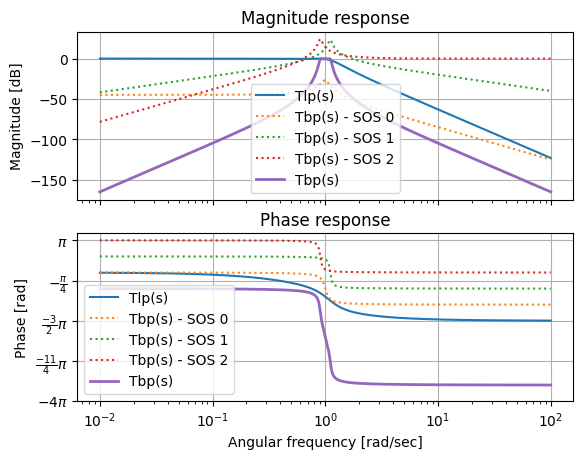

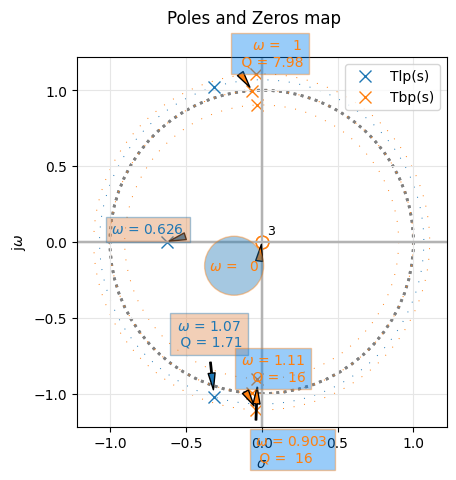

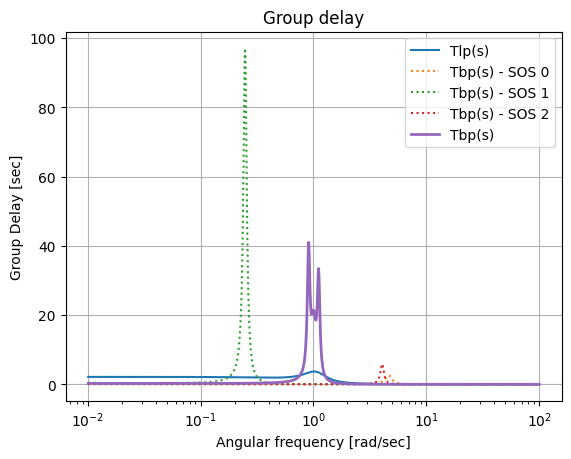

In [9]:
z, p, k = sig.cheb1ap(n, amax)

Nlp, Dlp = sig.zpk2tf(z, p, k)
tflp = TransferFunction( Nlp, Dlp )
SOSlp = sig.tf2sos(Nlp, Dlp)

print("Transferencia pasabajos")
pretty_print_lti(Nlp, Dlp)


analyze_sys(tflp, sys_name = "Tlp(s)")

Nbp, Dbp = sig.lp2bp(Nlp , Dlp, w0, BW/fo)
SOSbp = sig.tf2sos(Nbp, Dbp, analog = True)

print("Transferencia pasabanda")
pretty_print_lti(Nbp, Dbp)
pretty_print_SOS(SOSbp, mode = 'omegayq')

tfbp = TransferFunction(Nbp, Dbp)
analyze_sys(SOSbp, sys_name = "Tbp(s)")

Cabe destacar que cuando la simulación muestra como queda la transferencia pasabanda el numerador de la transferencia lo muestra distribuyendo todo como quiere, esto en realidad deberían ser 3 secciones de 2do orden con las ganancias distribuidas y el $\frac{\omega_0}{Q}$ correspondiente a cada sección en el numerador 

## Simulaciones en LTSpice

### Circuito con inductores discretos

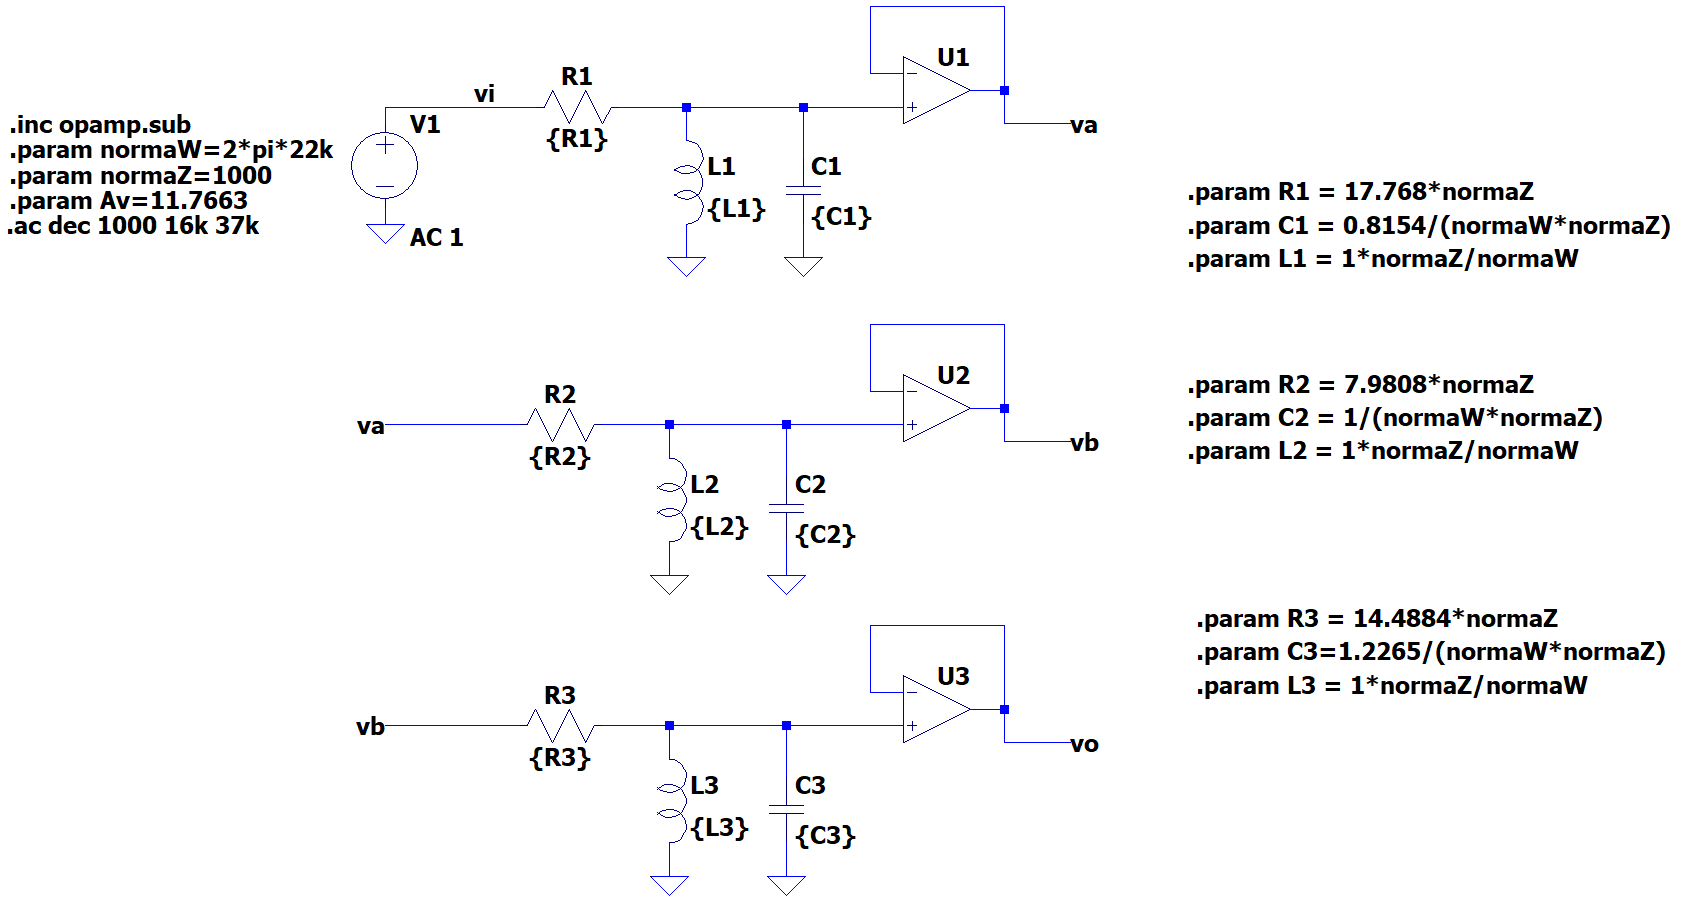

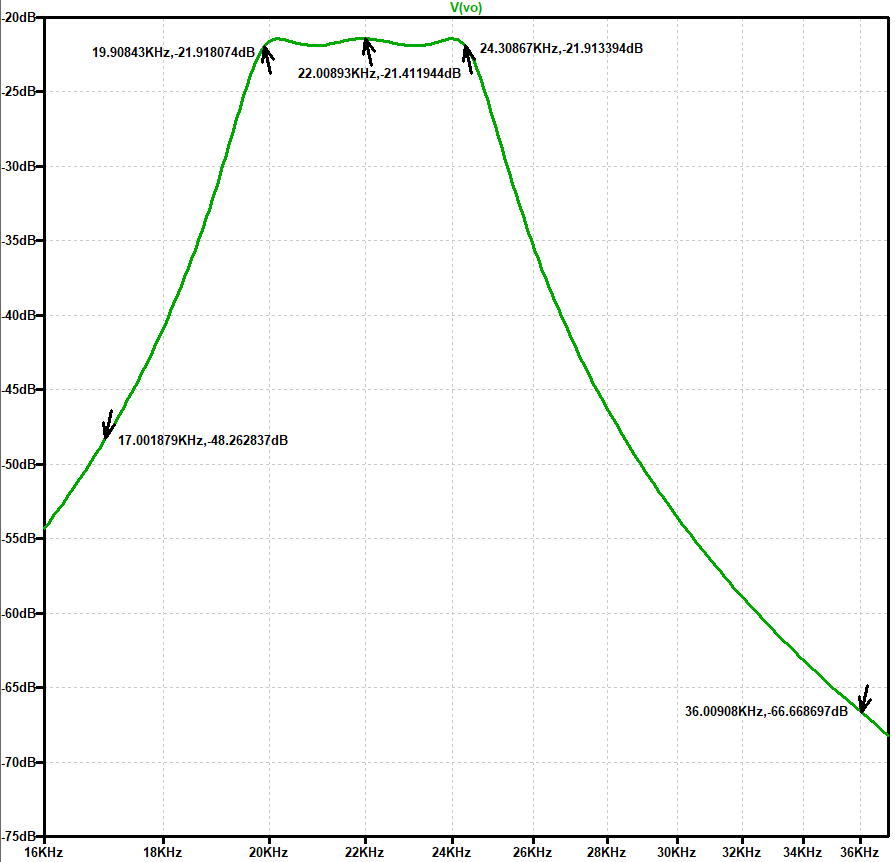

### Circuito con inductores activados

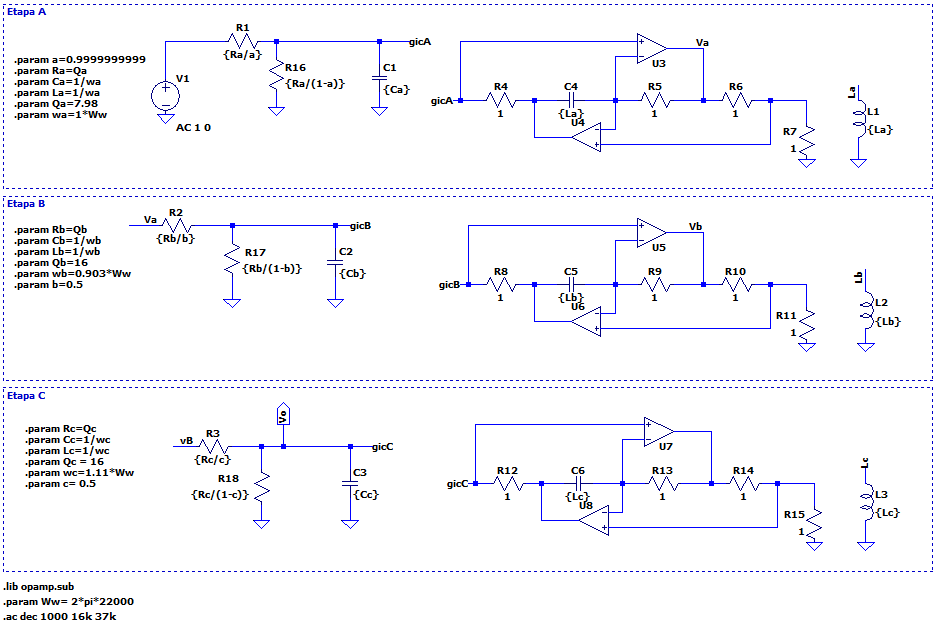

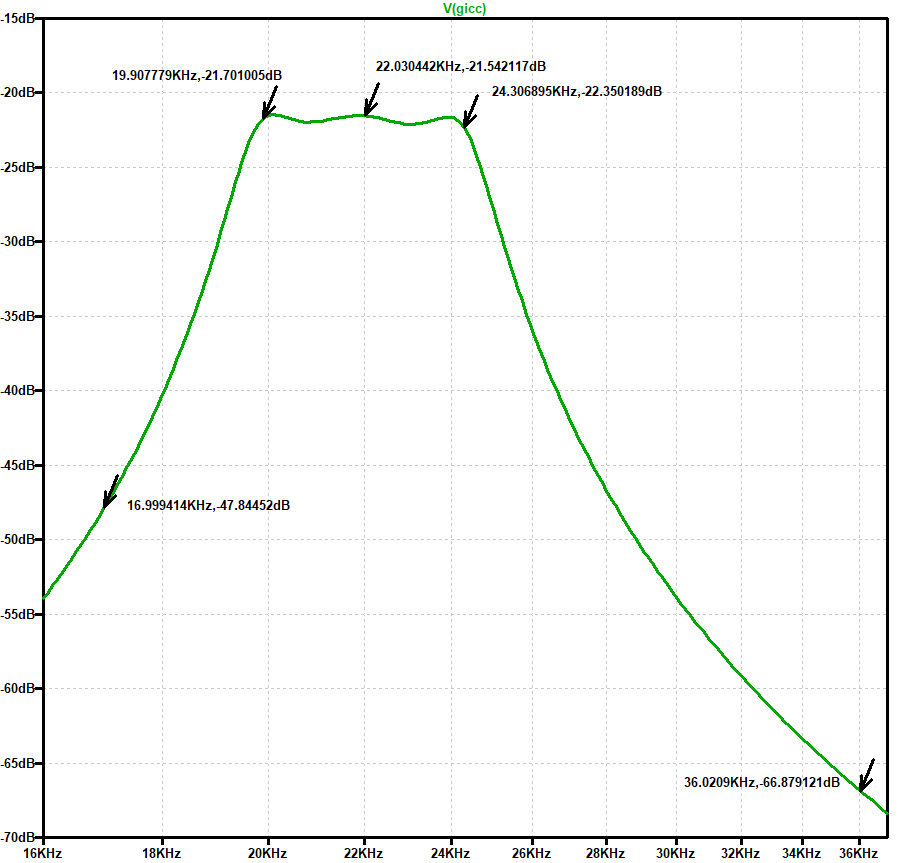

## Conclusiones y observaciones

Nos parece interesante el circuito propuesto para activar los inductores, ya que aprovecha la salida del amplificador operacional para evitar el uso de un buffer.

Cabe destacar que esta salida tiene un cierto nivel de amplificación. Es por ello que en la entrada de cada monoetapa se hace un levantamiento de R con atenuación "a".

Si hacemos un análisis circuital de este levantamiento, vemos que la transferencia será igual a la orginal (mismo diagrama de polos y ceros) solo que estará atenuado por el valor de "a".

En nuestro caso particular, al tomar la señal desde la salida del operacional del gic, veíamos una amplificación con ganancia 2. Por lo tanto la atenuación debería ser de a=0.5. De esta manera tanto el circuito con inductores discretos como el circuito con inductores activados son completamente equivalentes.

## Modalidad adoptada

Decidimos resolver el ejercicio cada uno por separado a nivel analítico. Nos fuimos realizando consultas mutuamente ante las dificultades que se presentaron, principalmente de enunciado o error en los despejes matemáticos. Una vez que ambos llegamos a la transferencia pasabanda normalizada comparamos resultados e hicimos una puesta en común.

Luego de esto, realizamos en conjunto las simulaciones.
La realización del pasivo no presentó dificultades, y la pudimos realizar correctamente.
En cuanto al circuito activo nos encontramos con algunos problemas para entender la naturaleza del circuito propuesto. Luego de debatirlo y realizar algunas pruebas pudimos terminar de entender lo que se proponía en el enunciado.

Para finalizar confeccionamos conjuntamente este informe y discutimos las conclusiones que sacó cada uno de este trabajo.


### Tareas realizadas por cada participante


Se especifíca que tarea realizó particularmente cada uno.
* Resolución del ejercicio en papel: Ambos
* Simulación en python: Joaquin
* Simulación en Spice: Nicolas
* Confección del informe: Ambos

Cabe destacar que para la realización de las simulaciones nos ayudamos mutuamente pero se muestra el nombre de quien realizó la simulación presentada en el informe.

## Aprendizajes Individuales

Joaquin: Por mi parte fue una buena práctica realizar los despejes matemáticos que presenta tanto obrtener la función del cheby asi como la transformación a pasabanda. En ambos casos tuve que realizar los cálculos 2 o 3 veces para confirmar que estaban bien. Por otro lado fue bueno tener una actividad en conjunto, me forzó a tener que coordinar y adaptarme a como trabaja el otro para que la tarea pueda salir bien y creo que ambos lo hicimos de buena manera.

Nicolas: Me sirvió mucho trabajar con una transferencia Chebyshev que implica un álgebra un poco más engorrosa que la que venimos trabajando. Además me pareció muy interesante el circuito propuesto donde ahorramos seguidores a costas de tener una amplificación en la salida del gic pero se soluciona fácilmente con un levantamiento en la etapa siguiente.